In [1]:
import sys
from pathlib import Path
prediction_mode_path = Path("../module")
sys.path.append(prediction_mode_path.as_posix())
import predictions_v05 as pred_mode

import pandas as pd
import numpy as np

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import joblib

import warnings
warnings.filterwarnings('ignore')

### model_type ==
#### RandomForestRegressor

#### DecisionTreeRegressor

#### KNeighborsRegressor

#### SVR

#### linear_model



In [2]:
molecular_descriptors_df = pred_mode.prepare_data('../Data/Indole_-_cytoprotekcja_.xlsx')

 18%|███████████████                                                                    | 8/44 [00:01<00:06,  5.76it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|██████████████████████████████████████████████████████████████████████████████████| 44/44 [00:01<00:00, 22.00it/s]


Data size (rows, columns): (44, 1613)
Data size after first reduction (rows, columns): (44, 1433)
Data size after second reduction (rows, columns): (44, 1182)


In [3]:
without_standardization, train_r2_, test_r2_, hist1, hist2 = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=0.39, 
                                                                                                    standardization=False, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=5,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=True)

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
        molecular descriptor name  corr_value  absolute correlation value
520                ETA_dEpsilon_D    0.412783                    0.412783
11

Target distribution histogram: 
AxesSubplot(0.125,0.11;0.775x0.77)


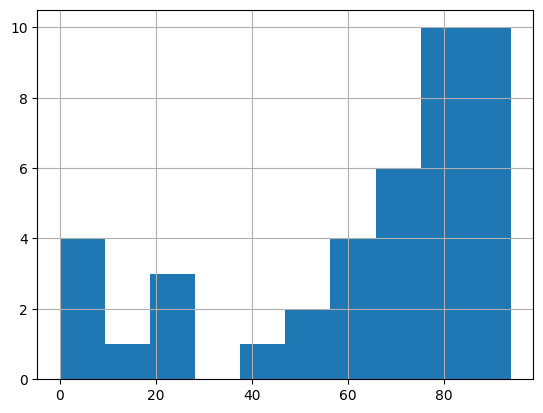

In [4]:
print('Target distribution histogram: ')
print(hist1['Cytoprotective activity [%]'].hist())

In [5]:
print("Number of features (molecular descriptors used): "+ str(len(hist2)))

Number of features (molecular descriptors used): 2


In [6]:
hist2

,molecular descriptor name,corr_value,absolute correlation value
520,ETA_dEpsilon_D,0.412783,0.412783
1160,nHBDon,0.394681,0.394681


In [7]:
with_standardization, train_r2__, test_r2__, hist1_, hist2_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=0.39, 
                                                                                                    standardization=True, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=5,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=True)

I am doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
        molecular descriptor name  corr_value  absolute correlation value
520                ETA_dEpsilon_D    0.412783                    0.412783
1160  

In [8]:
with_standardization.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 15,
 'splitter': 'best'}

In [9]:
with_standardization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']])

array([84.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75,
       84.75, 84.75, 84.75, 81.75, 84.75, 81.75, 84.75, 84.75, 84.75,
       84.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75,
       81.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75,
       84.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75, 84.75])

In [10]:
len(with_standardization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']]))

44

In [11]:
xs = r2_score(with_standardization.predict(molecular_descriptors_df[hist2_['molecular descriptor name']]), molecular_descriptors_df['Cytoprotective activity [%]'])

In [12]:
xs

-2160.6540198735315

In [13]:
print("Number of features (molecular descriptors used): "+ str(len(hist2)))

Number of features (molecular descriptors used): 2


In [14]:
hist2_

,molecular descriptor name,corr_value,absolute correlation value
520,ETA_dEpsilon_D,0.412783,0.412783
1160,nHBDon,0.394681,0.394681


## Search inside correlation space - selected test data

In [15]:
step = 0.01
initial_step = 0.25
last_step = 0.4
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
max_depth = [range(2, 30, 1)]
corr_th = []
second_list = []
third_list = []
f_list = []
fif_list = []
for i in first_list:
    for depth in max_depth[0]:
        
        without_standardization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=i, 
                                                                                                    standardization=False, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=depth,
                                                                                                    train_test_split_=False, 
                                                                                                    verbose=False)
        corr_th.append(i)
        second_list.append(train_r2)
        third_list.append(test_r2)
        f_list.append(len(h_))
        fif_list.append(depth)


In [16]:
df_without_standardization = pd.DataFrame(data=corr_th, columns=["Correlation threshold"])

In [17]:
df_without_standardization['Training data R^2 score'] = second_list
df_without_standardization['Test data R^2 score'] = third_list
df_without_standardization['Number of features'] = f_list
df_without_standardization['Depth number'] = fif_list

In [18]:
df_without_standardization

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Depth number
0,0.25,0.562994,0.000000,46,2
1,0.25,0.850968,0.000000,46,3
2,0.25,0.935790,-1.517276,46,4
3,0.25,0.961698,-3.838826,46,5
4,0.25,0.978536,-10.925627,46,6
...,...,...,...,...,...
415,0.39,0.949867,-0.799082,2,25
416,0.39,0.949867,-0.799082,2,26
417,0.39,0.949867,-0.799082,2,27
418,0.39,0.949867,-0.799082,2,28


## Plots

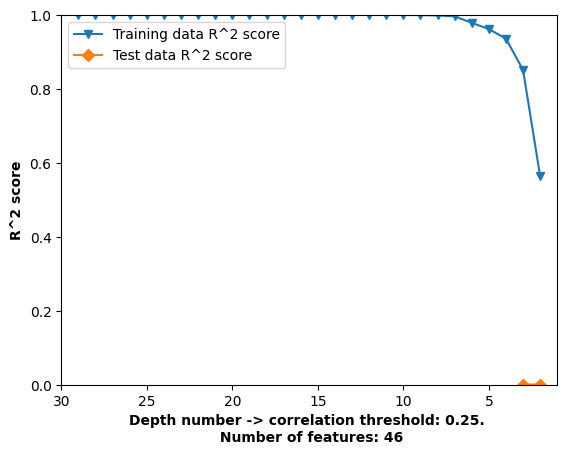

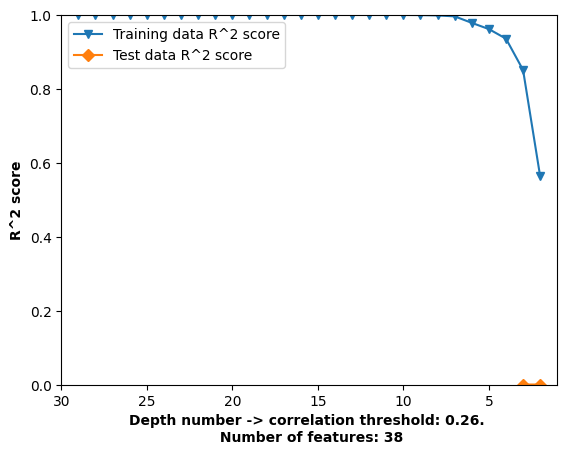

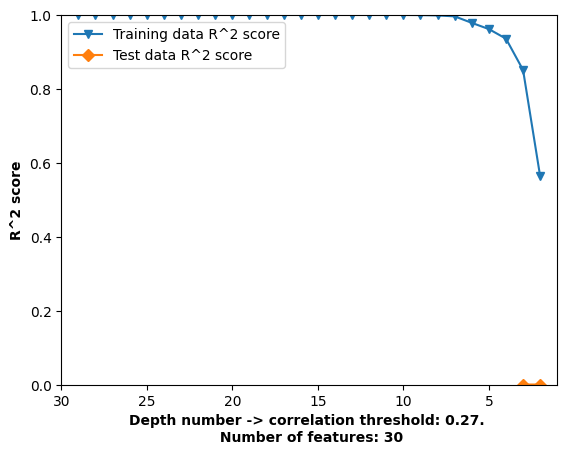

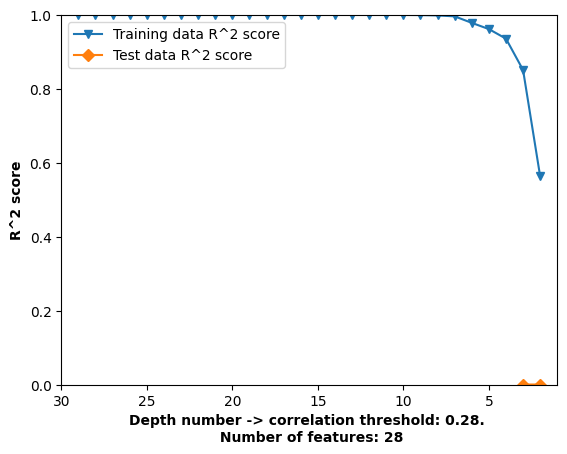

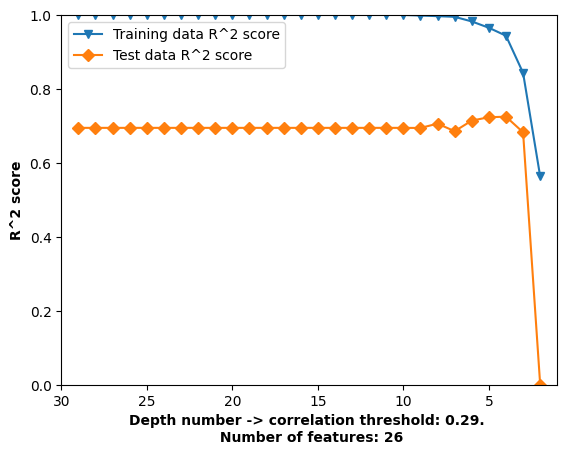

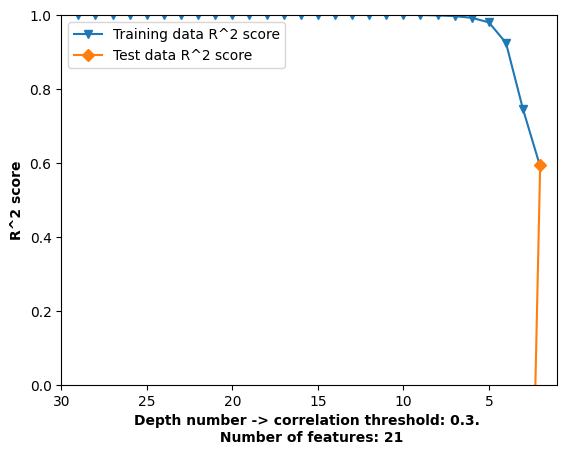

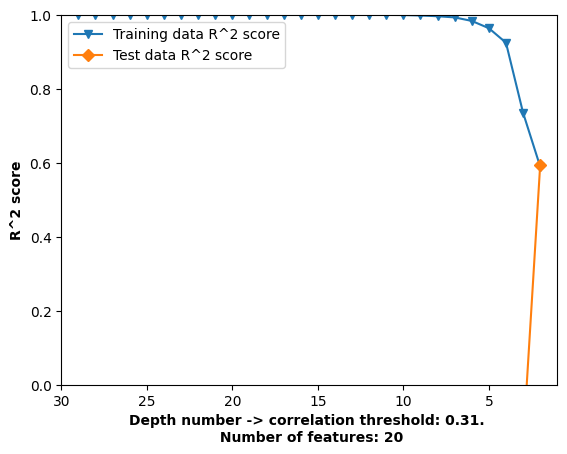

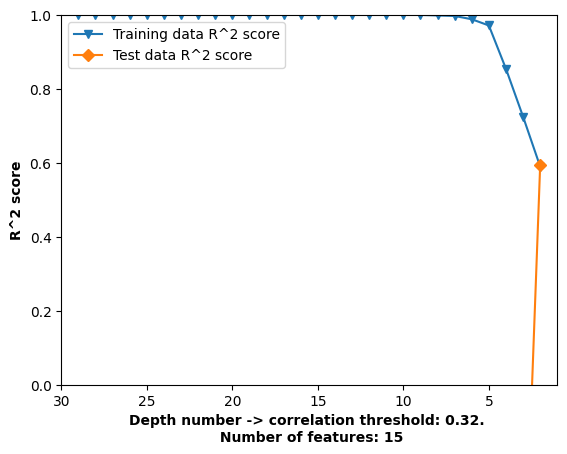

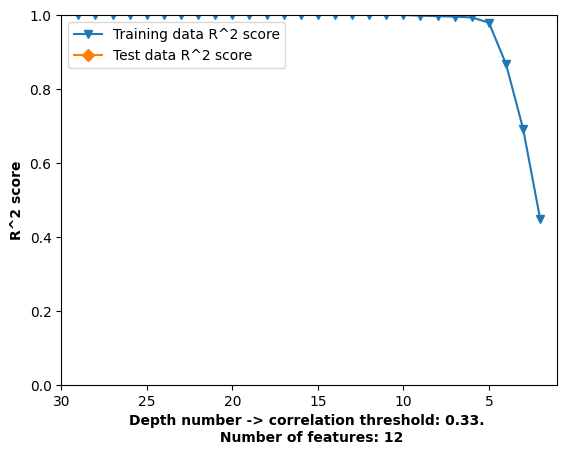

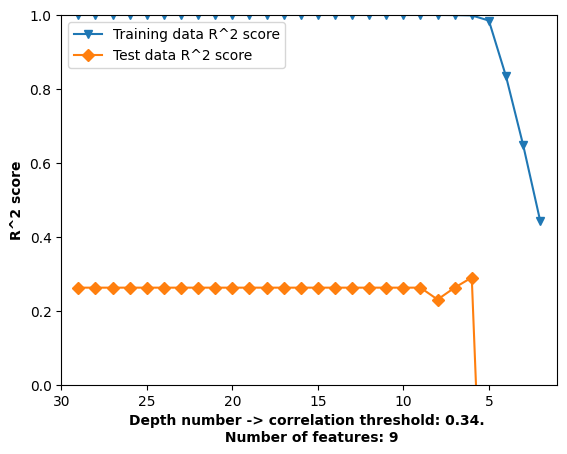

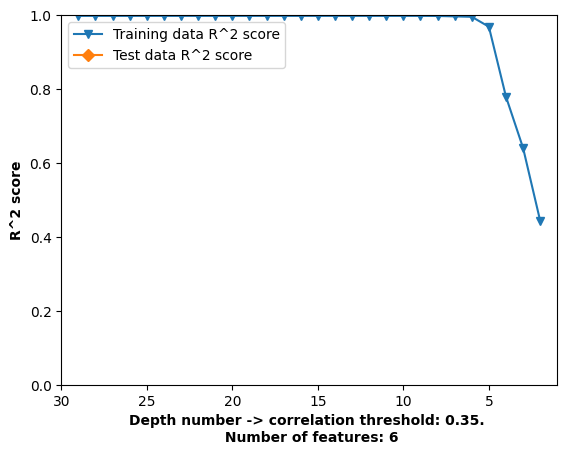

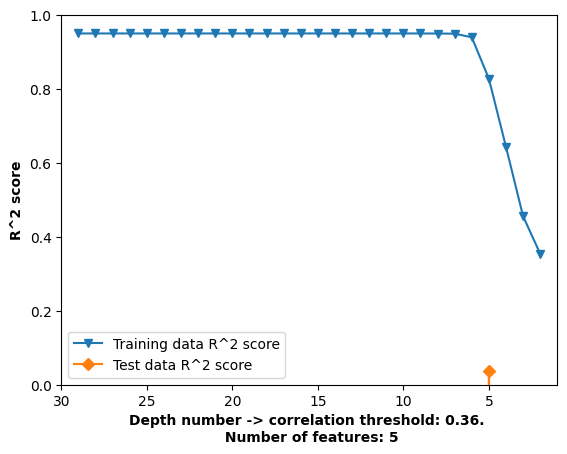

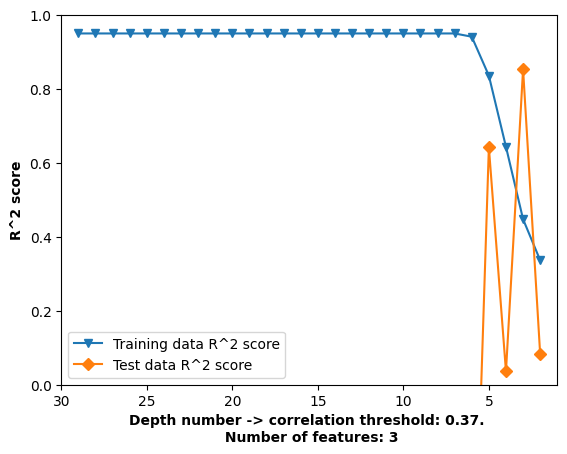

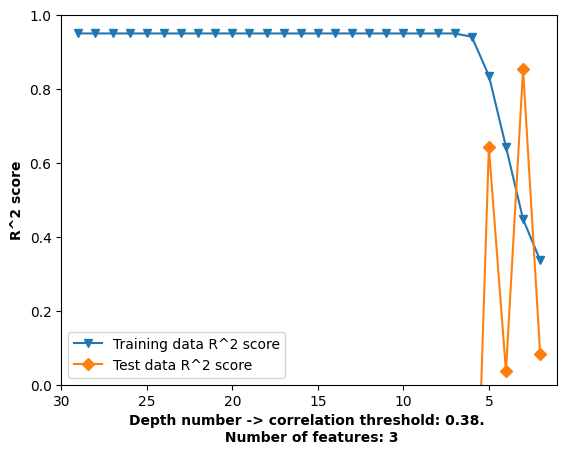

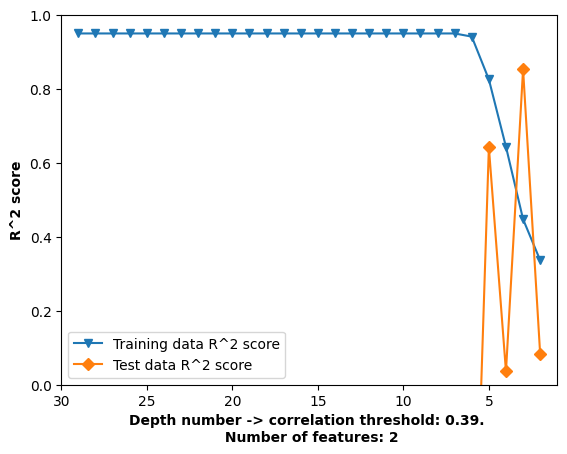

In [19]:
corre_list = [x / 100.0 for x in range(int(0.25*100), int(0.40*100), int(0.01*100))]
for element in corre_list:
    element_ = df_without_standardization[df_without_standardization['Correlation threshold'] == float(element)]
    plt.plot(element_['Depth number'], element_['Training data R^2 score'], label = "Training data R^2 score", marker='v')
    plt.plot(element_['Depth number'], element_['Test data R^2 score'], label = "Test data R^2 score", marker='D')
    plt.legend()
    plt.xlabel('Depth number -> correlation threshold: '+str(element)+'. \n Number of features: '+str(element_['Number of features'].iloc[0]), fontweight='bold')
    plt.xlim(max(element_['Depth number'])+1, min(element_['Depth number'])-1)
    plt.ylabel('R^2 score', fontweight='bold')
    plt.ylim([0, 1])
    #plt.savefig('decision_tree_'+str(element)+'.pdf', bbox_inches='tight')
    plt.show()

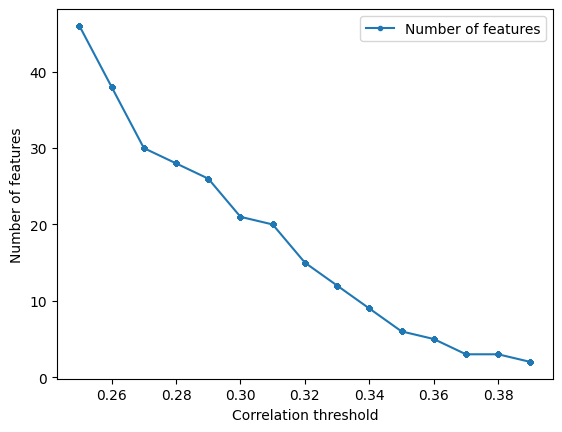

In [20]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

In [21]:
picked_ = float(input("Please input selected correlation threshold "))
element_ = df_without_standardization[df_without_standardization['Correlation threshold'] == picked_]
element_

Please input selected correlation threshold 0.39


,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Depth number
392,0.39,0.336114,0.081808,2,2
393,0.39,0.447294,0.853098,2,3
394,0.39,0.643133,0.035461,2,4
395,0.39,0.825468,0.642238,2,5
396,0.39,0.941299,-0.799082,2,6
397,0.39,0.949867,-0.799082,2,7
398,0.39,0.949867,-0.799082,2,8
399,0.39,0.949867,-0.799082,2,9
400,0.39,0.949867,-0.799082,2,10
401,0.39,0.949867,-0.799082,2,11


# sqrt(R^2)

In [22]:
r_a = df_without_standardization[df_without_standardization['Correlation threshold'] == picked_]

In [23]:
r_a['train R value'] = [np.sqrt(x) for x in r_a['Training data R^2 score']]

In [24]:
xcz = []
for element in r_a['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    

In [25]:
xcz

[0.2860208350399182,
 0.9236328070277827,
 0.18831078103786275,
 0.8013973052966219,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [26]:
r_a['test R value'] = xcz

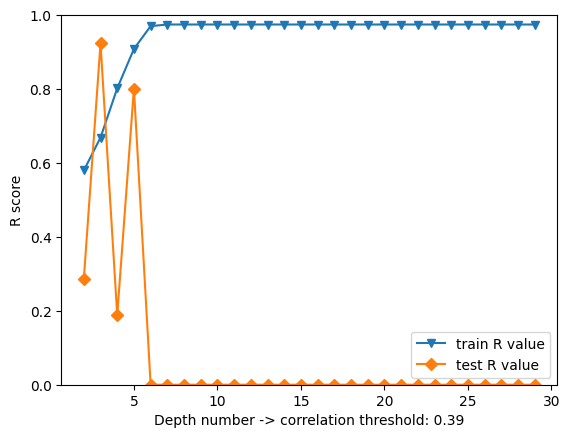

In [27]:
plt.plot(r_a['Depth number'], r_a['train R value'], label = "train R value", marker='v')
plt.plot(r_a['Depth number'], r_a['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Depth number -> correlation threshold: '+str(picked_))
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

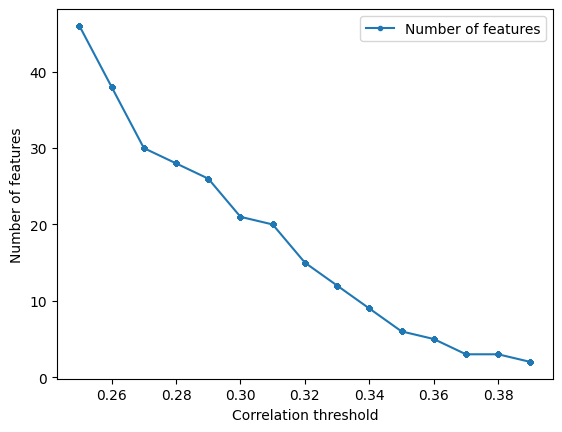

In [28]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

# Search inside correlation space - train test split

In [29]:
step = 0.01
initial_step = 0.25
last_step = 0.4
first_list = [x / 100.0 for x in range(int(initial_step*100), int(last_step*100), int(step*100))]
max_depth = [range(2, 30, 1)]
corr_th = []
second_list = []
third_list = []
f_list = []
fif_list = []
for i in first_list:
    for depth in max_depth[0]:
        
        without_standardization, train_r2, test_r2, _, h_ = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df, 
                                                                                                    correlation_threshold=i, 
                                                                                                    standardization=False, 
                                                                                                    model_type='DecisionTreeRegressor',
                                                                                                    max_depth=depth,
                                                                                                    train_test_split_=True, 
                                                                                                    verbose=False)
        corr_th.append(i)
        second_list.append(train_r2)
        third_list.append(test_r2)
        f_list.append(len(h_))
        fif_list.append(depth)
        
df_without_standardization = pd.DataFrame(data=corr_th, columns=["Correlation threshold"])
df_without_standardization['Training data R^2 score'] = second_list
df_without_standardization['Test data R^2 score'] = third_list
df_without_standardization['Number of features'] = f_list
df_without_standardization['Depth number'] = fif_list
df_without_standardization.head()

,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Depth number
0,0.25,0.576506,0.000000,46,2
1,0.25,0.760847,-5.803401,46,3
2,0.25,0.939324,-3.081030,46,4
3,0.25,0.981105,-2.831780,46,5
4,0.25,0.992646,-2.731484,46,6


## Plots

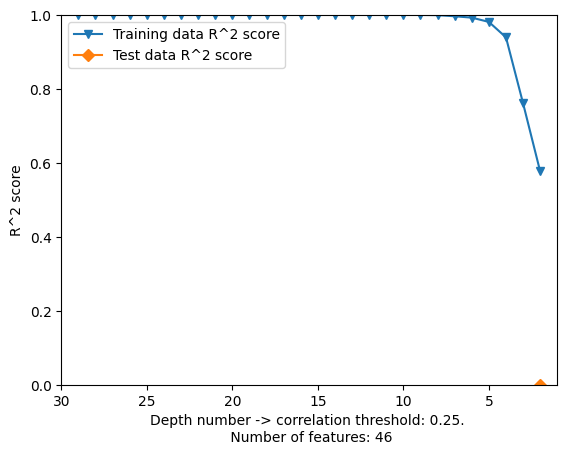

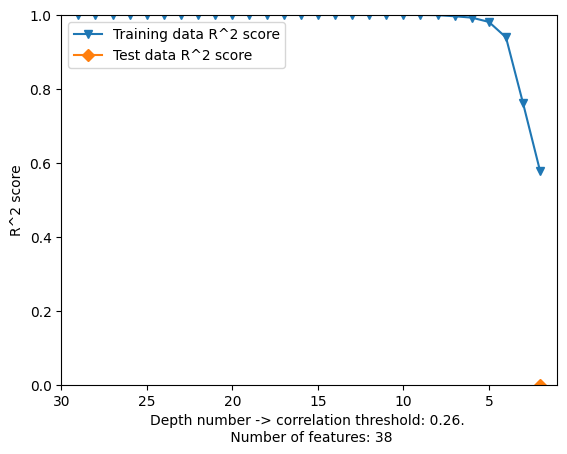

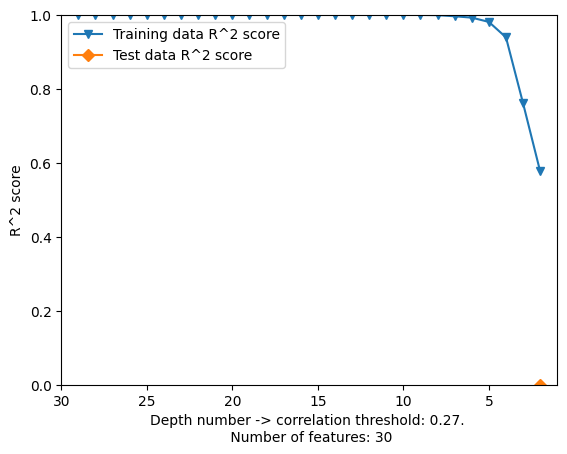

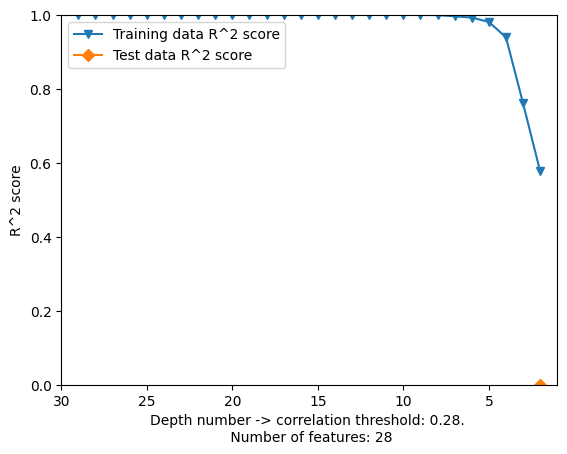

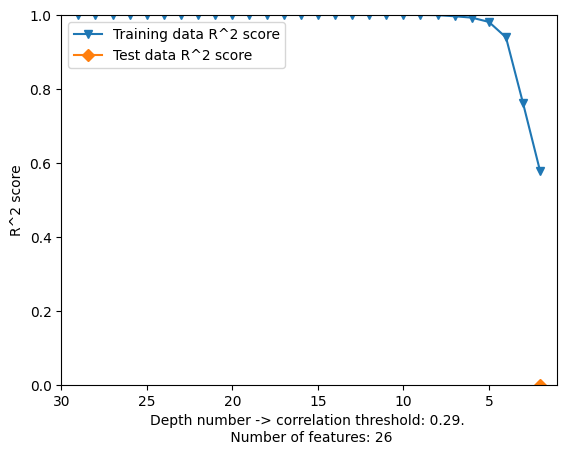

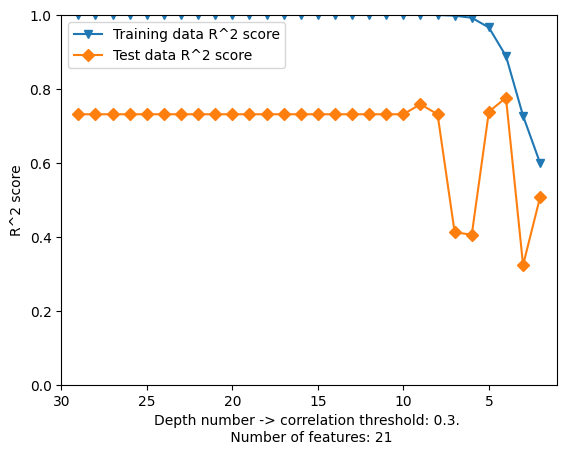

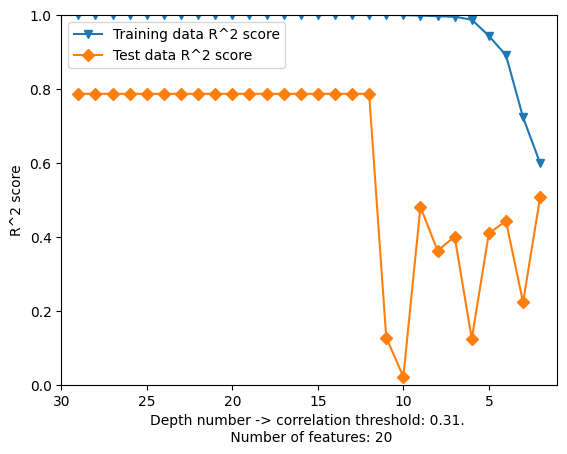

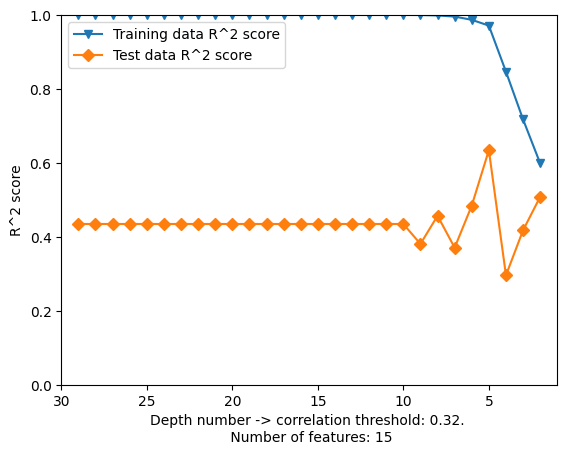

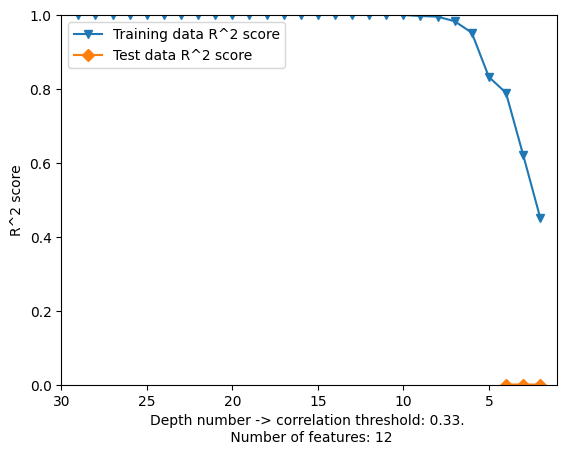

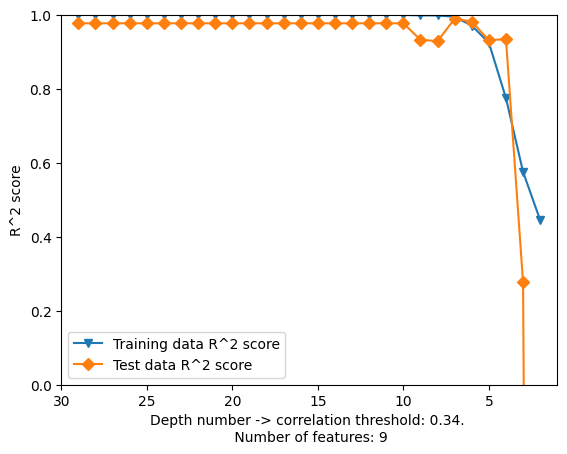

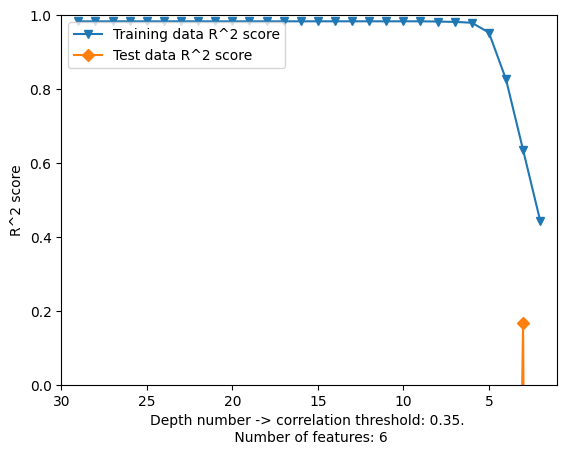

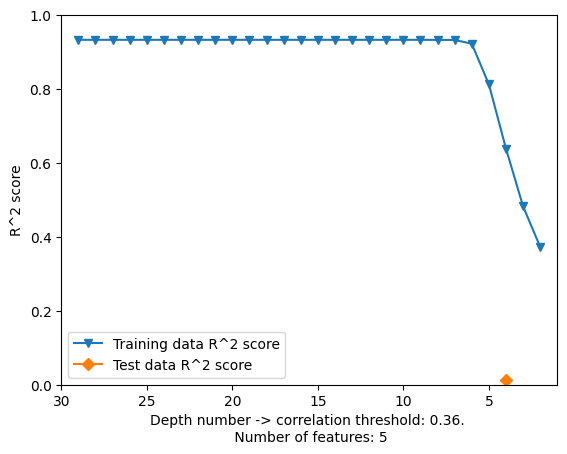

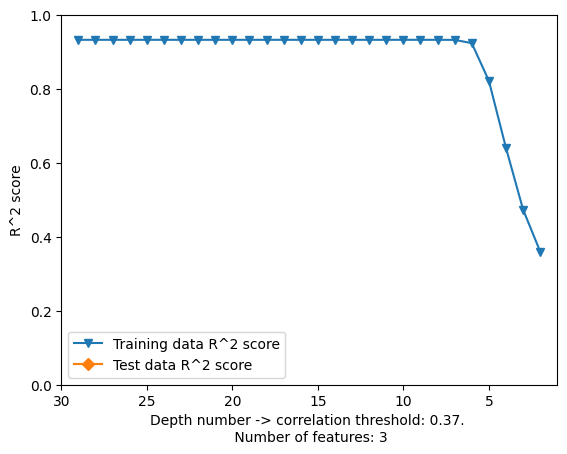

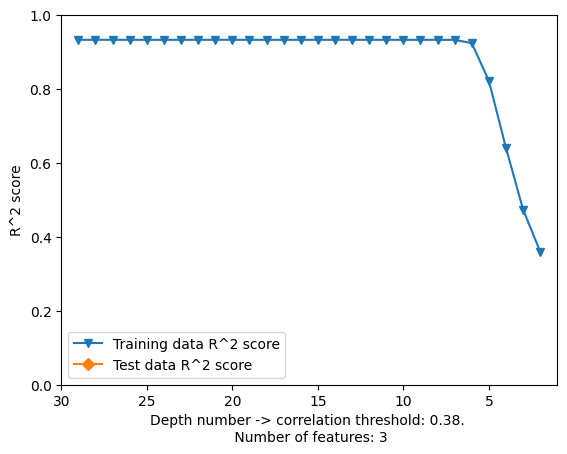

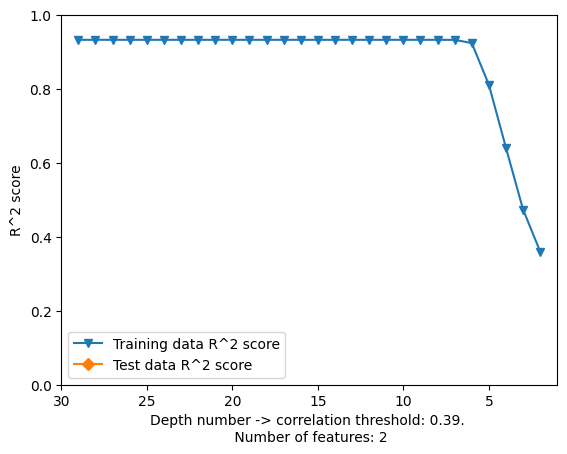

In [30]:
corre_list = [x / 100.0 for x in range(int(0.25*100), int(0.40*100), int(0.01*100))]
for element in corre_list:
    element_ = df_without_standardization[df_without_standardization['Correlation threshold'] == float(element)]
    plt.plot(element_['Depth number'], element_['Training data R^2 score'], label = "Training data R^2 score", marker='v')
    plt.plot(element_['Depth number'], element_['Test data R^2 score'], label = "Test data R^2 score", marker='D')
    plt.legend()
    plt.xlabel('Depth number -> correlation threshold: '+str(element)+'. \n Number of features: '+str(element_['Number of features'].iloc[0]))
    plt.xlim(max(element_['Depth number'])+1, min(element_['Depth number'])-1)
    plt.ylabel('R^2 score')
    plt.ylim([0, 1])
    plt.show()

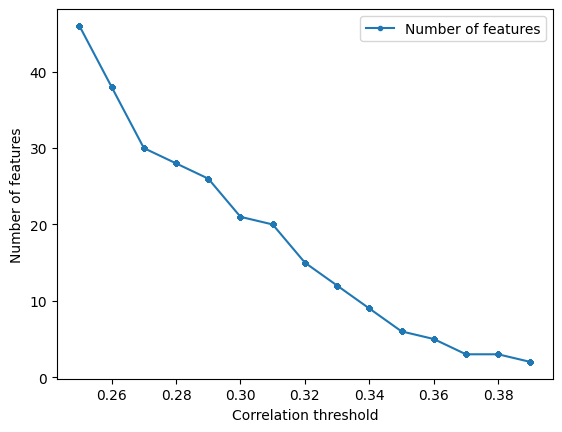

In [31]:
plt.plot(df_without_standardization['Correlation threshold'], df_without_standardization['Number of features'], label = "Number of features", marker='.')
plt.legend()
plt.xlabel('Correlation threshold')
plt.ylabel('Number of features')
plt.show()

In [32]:
picked_ = float(input("Please input selected correlation threshold "))
element_ = df_without_standardization[df_without_standardization['Correlation threshold'] == picked_]
element_

Please input selected correlation threshold 0.39


,Correlation threshold,Training data R^2 score,Test data R^2 score,Number of features,Depth number
392,0.39,0.359808,-22.402378,2,2
393,0.39,0.473461,-2.887546,2,3
394,0.39,0.640379,-0.139611,2,4
395,0.39,0.811287,-1.289141,2,5
396,0.39,0.923886,-12.930112,2,6
397,0.39,0.932521,-86.041949,2,7
398,0.39,0.932661,-86.041949,2,8
399,0.39,0.932661,-86.041949,2,9
400,0.39,0.932661,-86.041949,2,10
401,0.39,0.932661,-86.041949,2,11


## sqrt(R^2)

In [33]:
r_a = df_without_standardization[df_without_standardization['Correlation threshold'] == picked_]
r_a['train R value'] = [np.sqrt(x) for x in r_a['Training data R^2 score']]
xcz = []
for element in r_a['Test data R^2 score']:
    x = np.sqrt(element)
    try:
        if x > 0:
            xcz.append(x)
        else:
            xcz.append(0)
    except:
        pass
    
r_a['test R value'] = xcz

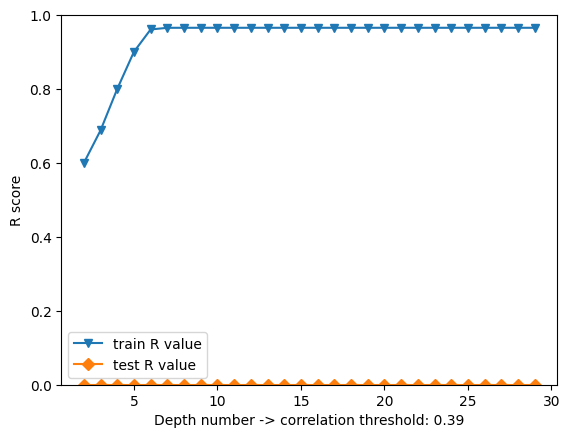

In [34]:
plt.plot(r_a['Depth number'], r_a['train R value'], label = "train R value", marker='v')
plt.plot(r_a['Depth number'], r_a['test R value'], label = "test R value", marker='D')
plt.legend()
plt.xlabel('Depth number -> correlation threshold: '+str(picked_))
plt.ylabel('R score')
plt.ylim([0, 1])
plt.show()

## Final model

In [35]:
final_model = pred_mode.prepare_data_and_create_model(molecular_descriptors_df=molecular_descriptors_df,
                                                      correlation_threshold=0.39,
                                                      standardization=False, 
                                                      model_type='DecisionTreeRegressor',
                                                      max_depth=5,
                                                      train_test_split_=False,
                                                      verbose=True)

I am not doing standardization...
  molecular descriptor name
0                    AATS0Z
1                  AATS0are
2                    AATS0d
3                   AATS0dv
4                    AATS0i
  molecular descriptor name  corr_value
0                    AATS0Z   -0.105872
1                  AATS0are    0.160494
2                    AATS0d   -0.005044
3                   AATS0dv    0.121256
4                    AATS0i    0.140698
  molecular descriptor name  corr_value  absolute correlation value
0                    AATS0Z   -0.105872                    0.105872
1                  AATS0are    0.160494                    0.160494
2                    AATS0d   -0.005044                    0.005044
3                   AATS0dv    0.121256                    0.121256
4                    AATS0i    0.140698                    0.140698
        molecular descriptor name  corr_value  absolute correlation value
520                ETA_dEpsilon_D    0.412783                    0.412783
11

In [36]:
final_model[0].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 15,
 'splitter': 'best'}

In [37]:
final_model[0]

DecisionTreeRegressor(max_depth=5, random_state=15)

In [38]:
final_model[0].tree_

In [39]:
final_model[4]['molecular descriptor name'].to_list()

['ETA_dEpsilon_D', 'nHBDon']

In [40]:
from sklearn import tree

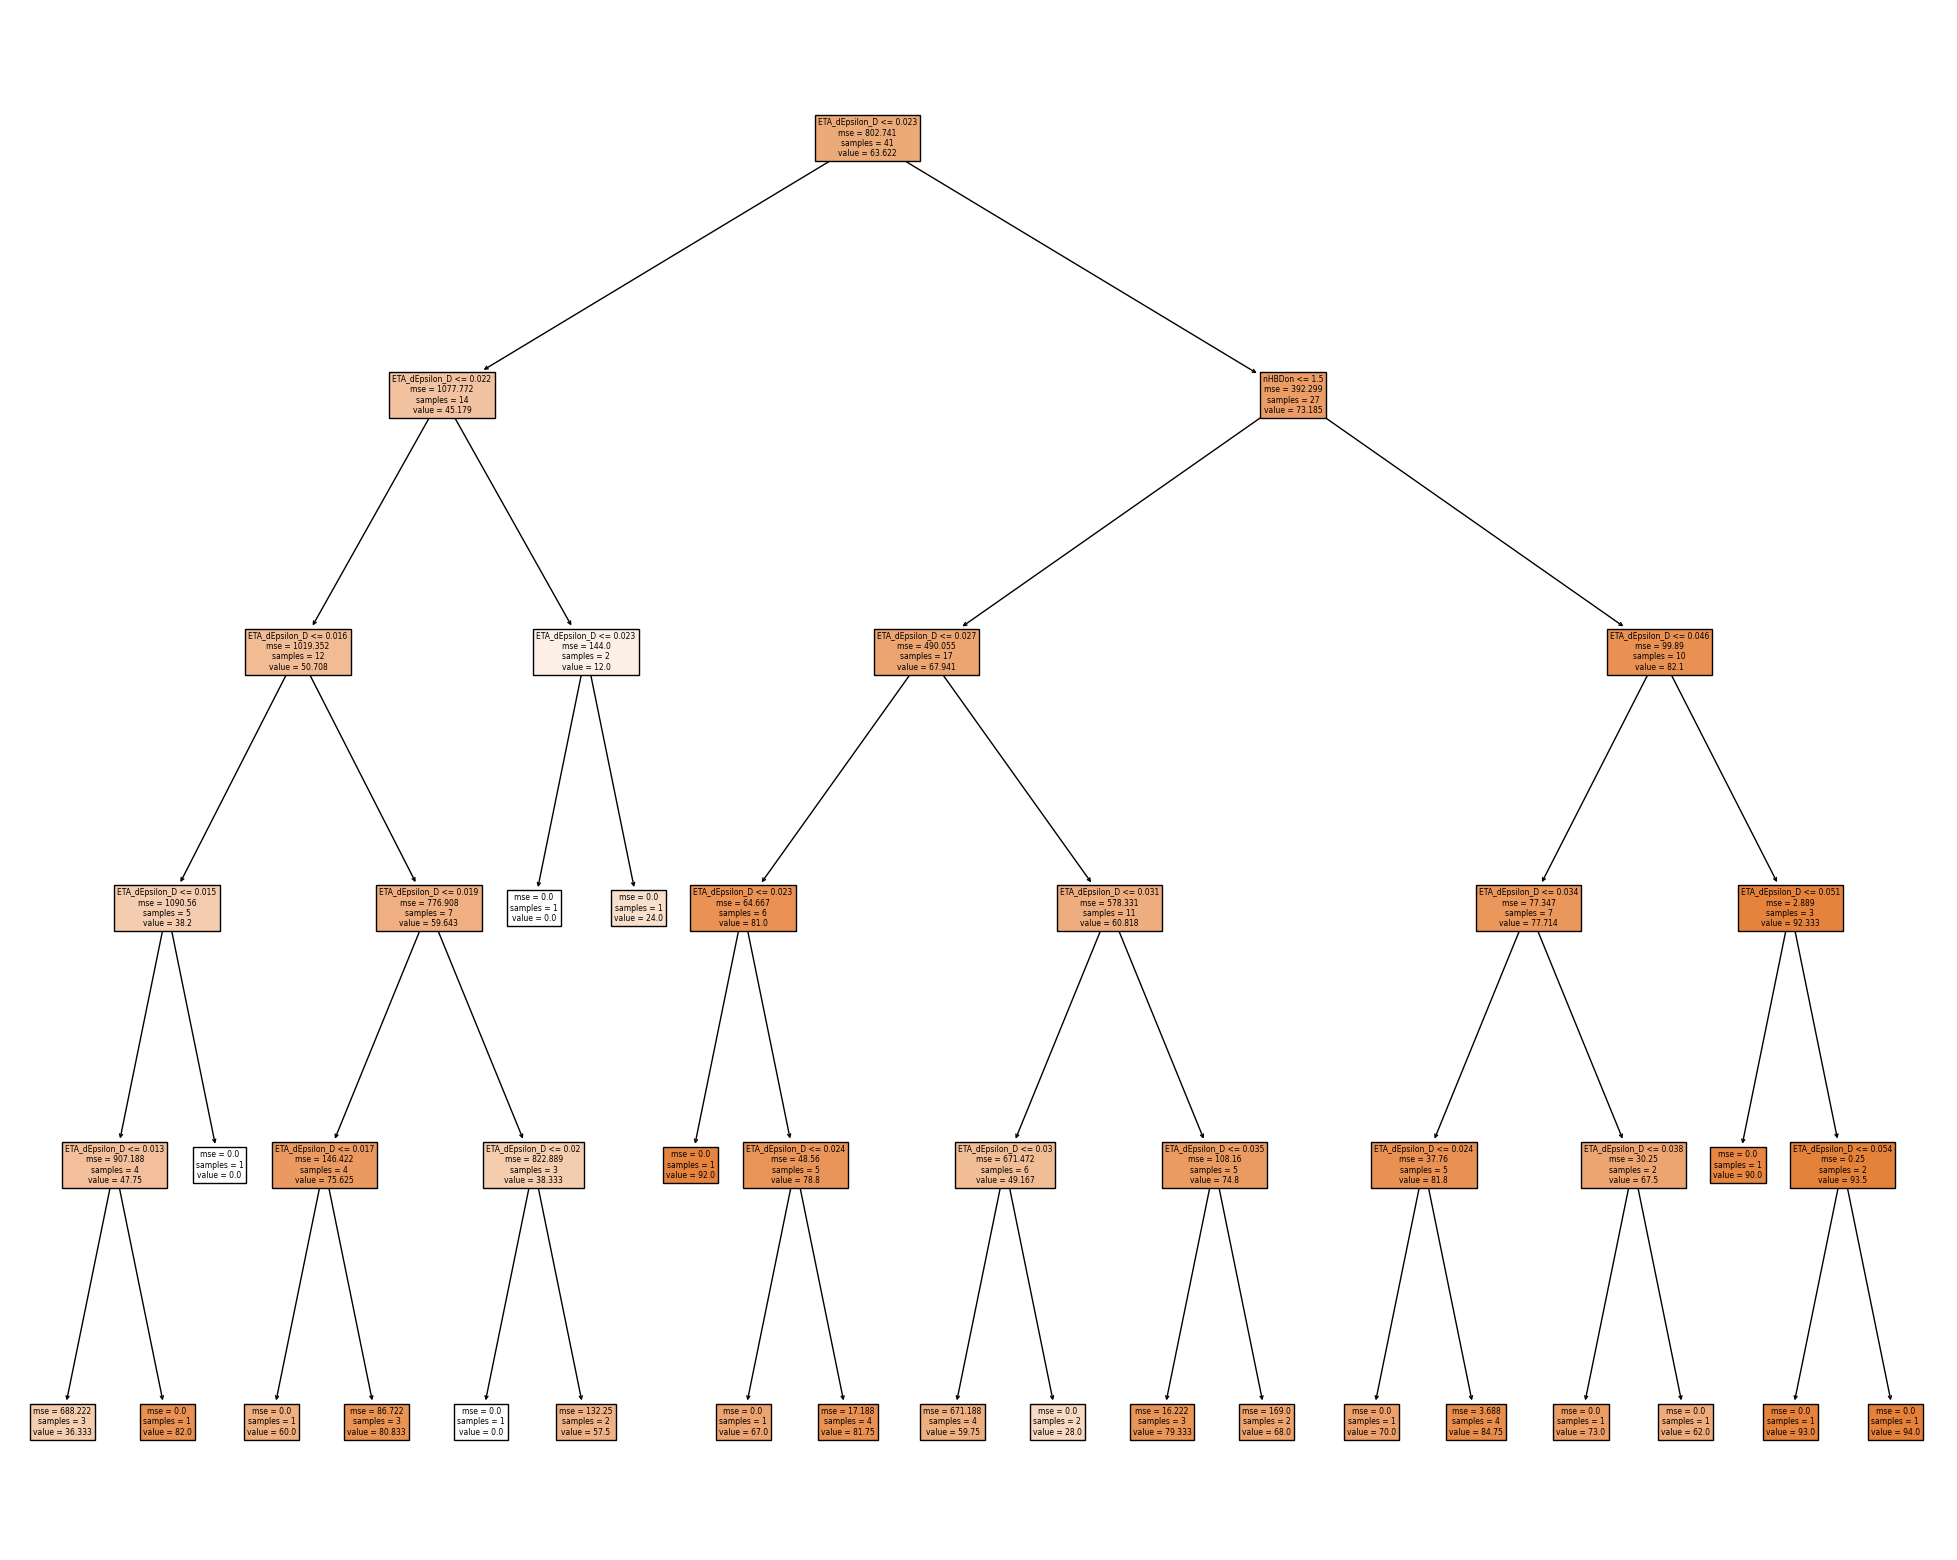

In [41]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(final_model[0], 
                   feature_names = final_model[4]['molecular descriptor name'].to_list(),
                   filled=True)
plt.savefig('decision_tree_model.pdf',bbox_inches = "tight")

## Predict target feature

In [42]:
to_prediction = pred_mode.prepare_data('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')

 29%|██████████████████████▊                                                         | 254/891 [00:03<00:06, 96.20it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 46%|████████████████████████████████████▌                                           | 407/891 [00:05<00:07, 66.32it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 48%|██████████████████████████████████████▎                                         | 427/891 [00:06<00:06, 76.37it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 55%|████████████████████████████████████████████▏                                   | 492/891 [00:07<00:06, 59.89it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 57%|█████████████████████████████████████████████▉                                  | 512/891 [00:07<00:09, 41.75it/s]

C:\Users\aleks\anaconda3\envs\cheminf_gpu\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


100%|████████████████████████████████████████████████████████████████████████████████| 891/891 [00:14<00:00, 60.60it/s]


Data size (rows, columns): (891, 1613)
Data size after first reduction (rows, columns): (891, 1226)
Data size after second reduction (rows, columns): (891, 1100)
There is an issue with the target values...


In [43]:
predicted_activity = final_model[0].predict(to_prediction[final_model[4]['molecular descriptor name']])

In [44]:
smiles = pd.read_excel('../Data/Proposed_structures_with_AI_indole_tanimoto_similarity_.xlsx')
smiles = smiles['new_SMILES']
smiles = smiles.to_list()
save_to_df = pd.DataFrame(data=smiles, columns=['SMILES'])

In [45]:
print(len(smiles))
print(len(predicted_activity))

891
891


In [46]:
save_to_df.head()

,SMILES
0,Clc1cn(Cc2c[nH]c3ccccc23)cn1
1,O=c1[nH]ccn1Cc1c[nH]c2ccccc12
2,Cc1cncn1Cc1c[nH]c2ccccc12
3,CCc1cn(Cc2c[nH]c3ccccc23)cn1
4,Cc1cn(Cc2c[nH]c3ccccc23)c(C)n1


In [47]:
save_to_df['Predicted activity'] = predicted_activity

In [48]:
save_to_df.head()

,SMILES,Predicted activity
0,Clc1cn(Cc2c[nH]c3ccccc23)cn1,28.00
1,O=c1[nH]ccn1Cc1c[nH]c2ccccc12,94.00
2,Cc1cncn1Cc1c[nH]c2ccccc12,59.75
3,CCc1cn(Cc2c[nH]c3ccccc23)cn1,81.75
4,Cc1cn(Cc2c[nH]c3ccccc23)c(C)n1,81.75


In [49]:
save_to_df.to_excel('../Data/Predicted_activity_decision_tree.xlsx')